In [1]:
from classes.analyzer import Analyzer
from classes.data_generator import DataGenerator
from classes.data_preprocessor import DataPreprocessor
from classes.explainer import Explainer
from classes.model import Model

In [2]:
# For Kaggle
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# print("Using GPU: ", tf.test.is_gpu_available())

# # List available physical devices
# tf.config.list_physical_devices('GPU')

# # Set memory growth for the GPU
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Allow TensorFlow to use only as much GPU memory as needed
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("Memory growth enabled for GPUs")
#     except RuntimeError as e:
#         print(e)

[ True  True False False False]


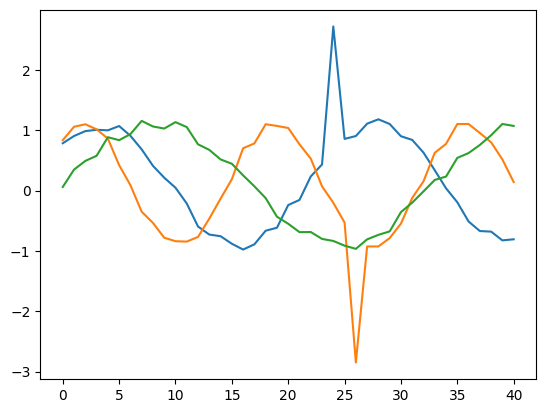

[False False  True False False]


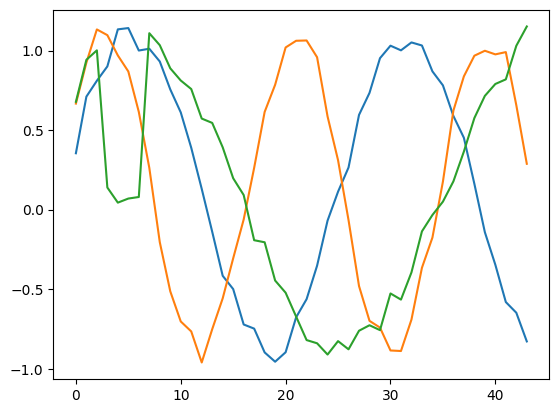

[False False False  True False]


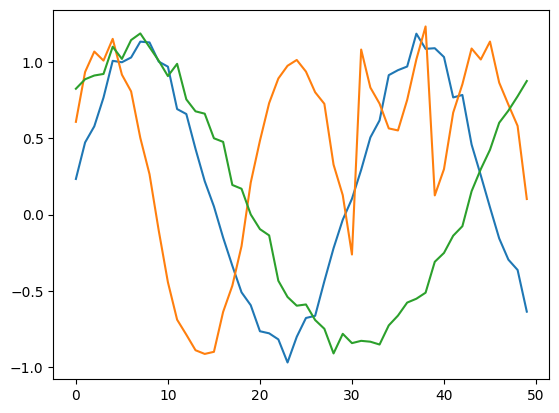

X shape: (41, 3), y shape: (5,)


In [3]:
data_gen = DataGenerator()
data_gen.visualize_data()
xl, yl, masks = data_gen.get_data()

print(f"X shape: {xl[0].shape}, y shape: {yl[0].shape}")

In [4]:
# Data padded from the right
preprocessor = DataPreprocessor(debug=True)
x_train, y_train, masks_train, x_test, y_test, masks_test, x_val, y_val, masks_val = preprocessor.get_data(xl, yl, masks)

# Data padded from the left
preprocessor_pre = DataPreprocessor(padding='pre')
x_train_pre, y_train_pre, masks_train_pre, x_test_pre, y_test_pre, masks_test_pre, x_val_pre, y_val_pre, masks_val_pre = preprocessor_pre.get_data(xl, yl, masks)

X shape: (50000, 59, 3)
y shape: (50000, 5)
Train / Test / Val: 40000 / 5000 / 5000


In [5]:
# For local
path_post = "models/post.h5" 
path_pre = "models/pre.h5"

# For Kaggle
# path_post = "/kaggle/input/post/tensorflow2/default/1/post.h5"
# path_pre = "/kaggle/input/pre/tensorflow2/default/1/pre.h5"

model_post = Model(load=True, path=path_post)
model_pre = Model(load=True, path=path_pre, padding="pre")

In [6]:
accuracy = model_post.evaluate(x_test, y_test, compute_preds=True)
accuracy_pre = model_pre.evaluate(x_test_pre, y_test_pre, compute_preds=True)

print(f"Accuracy: {accuracy}")
print(f"Accuracy pre: {accuracy_pre}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Accuracy: 0.9932
Accuracy pre: 0.9922


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted classes: [[0. 1. 1. 0. 0.]]
Deffect class 1


<Figure size 1500x400 with 0 Axes>

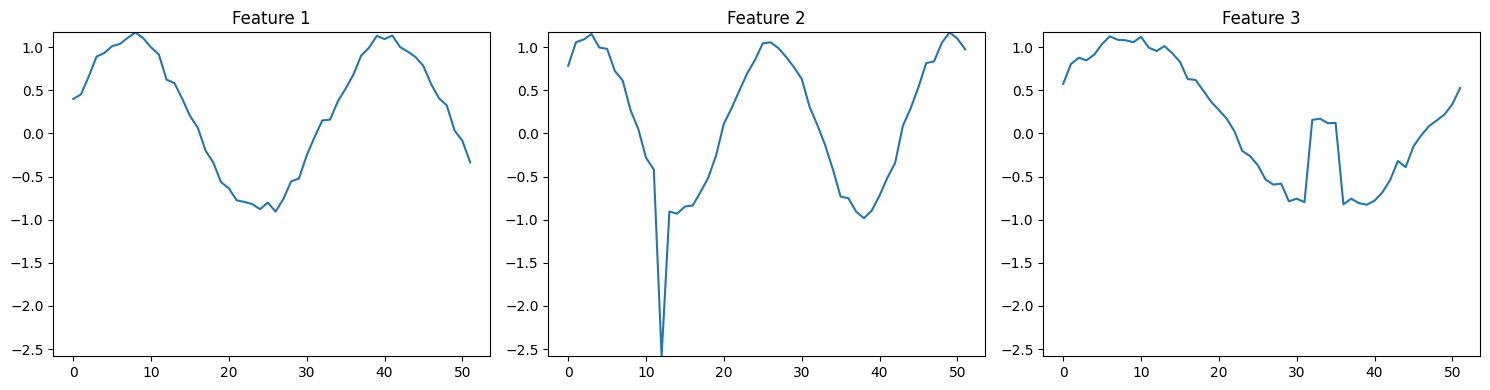

<Figure size 1500x400 with 0 Axes>

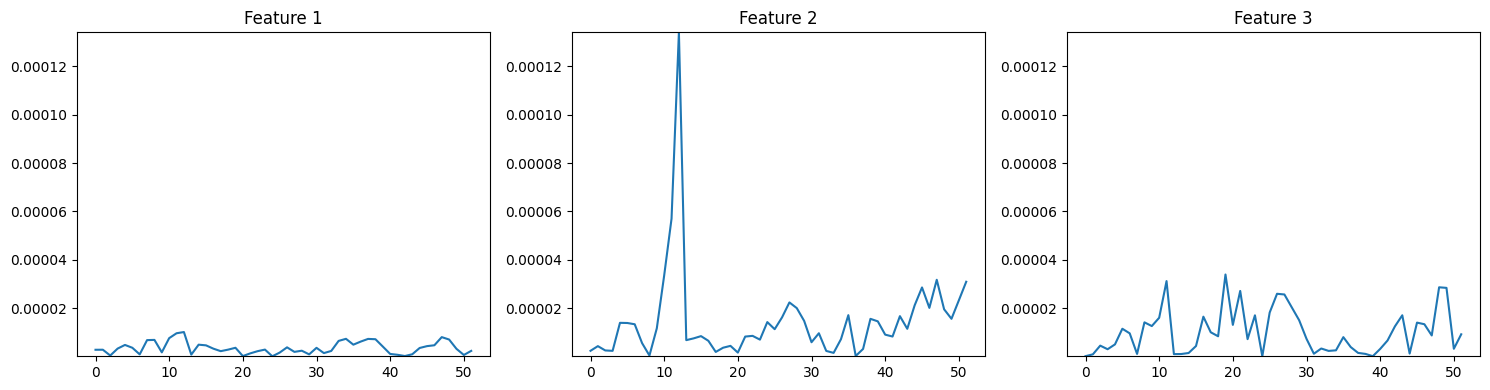

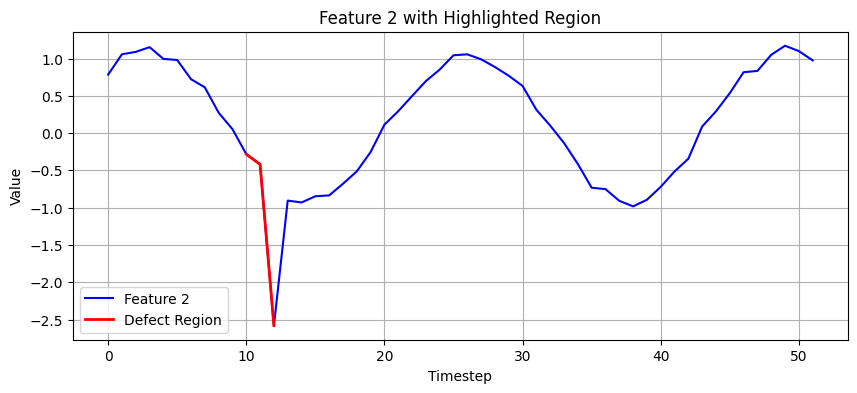

Deffect class 2


<Figure size 1500x400 with 0 Axes>

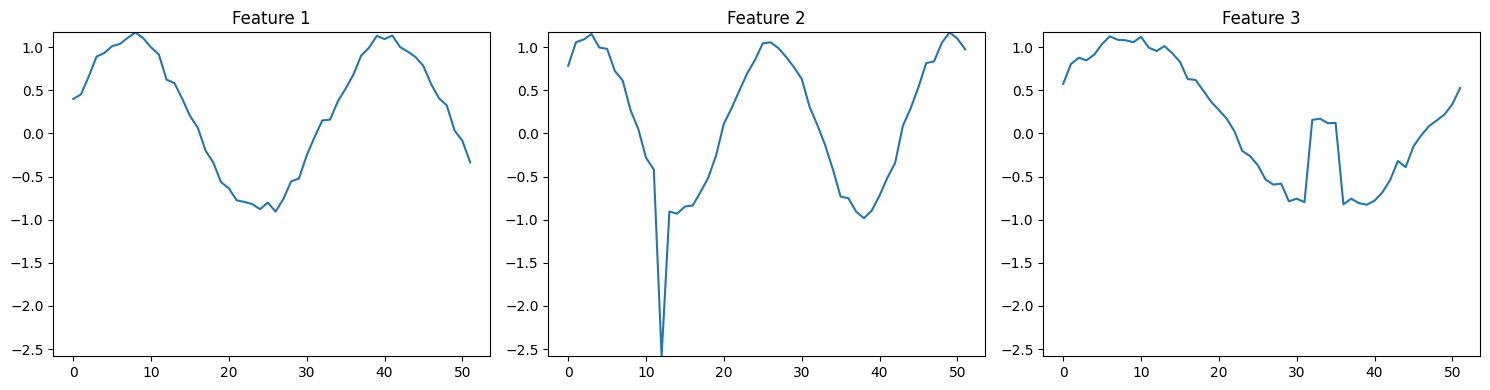

<Figure size 1500x400 with 0 Axes>

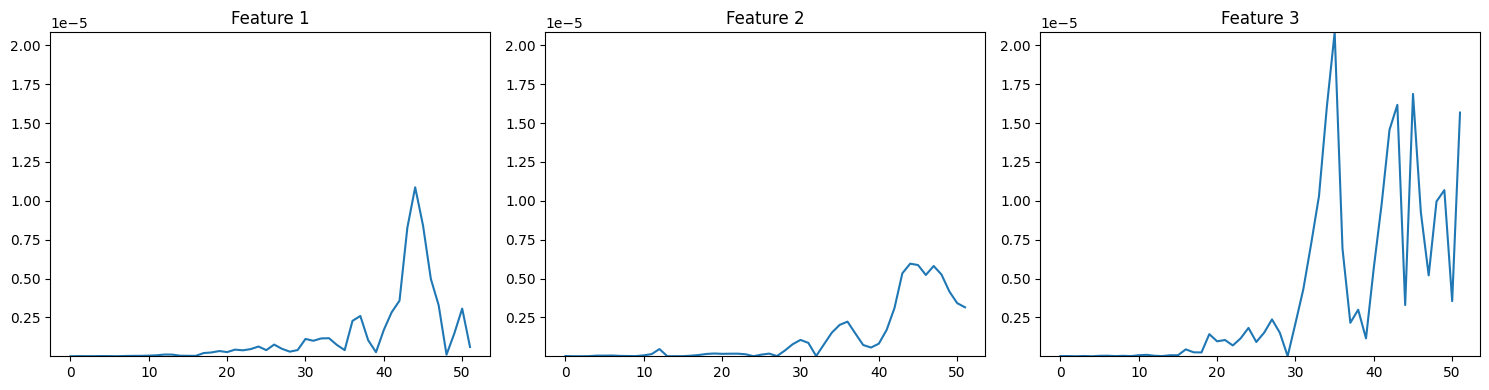

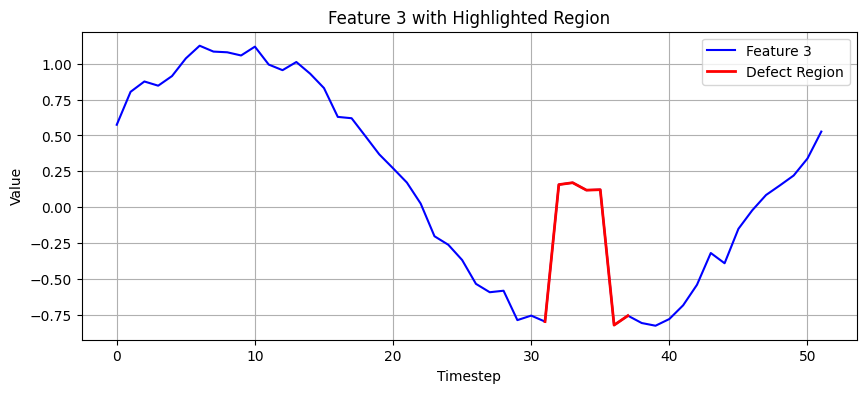

In [7]:
explainer = Explainer(model_post, x_test, y_test)
_ = explainer.gen_single(2, integrated_grads=False)

In [8]:
explainer.gen_explanations(50)

Generating Explanations:   0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Generating Explanations:   2%|▏         | 1/50 [00:01<00:59,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Generating Explanations:   6%|▌         | 3/50 [00:02<00:33,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Generating Explanations:   8%|▊         | 4/50 [00:02<00:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Generating Explanations:  12%|█▏        | 6/50 [00:03<00:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  14%|█▍        | 7/50 [00:04<00:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Generating Explanations:  16%|█▌        | 8/50 [00:06<00:37,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Generating Explanations:  18%|█▊        | 9/50 [00:06<00:32,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Generating Explanations:  20%|██        | 10/50 [00:07<00:33,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  24%|██▍       | 12/50 [00:08<00:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Generating Explanations:  26%|██▌       | 13/50 [00:08<00:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Generating Explanations:  28%|██▊       | 14/50 [00:09<00:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Generating Explanations:  30%|███       | 15/50 [00:10<00:28,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  32%|███▏      | 16/50 [00:11<00:26,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  34%|███▍      | 17/50 [00:12<00:24,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Generating Explanations:  36%|███▌      | 18/50 [00:12<00:22,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Generating Explanations:  38%|███▊      | 19/50 [00:13<00:24,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  40%|████      | 20/50 [00:14<00:22,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Generating Explanations:  42%|████▏     | 21/50 [00:15<00:22,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  44%|████▍     | 22/50 [00:15<00:20,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Generating Explanations:  46%|████▌     | 23/50 [00:17<00:29,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Generating Explanations:  48%|████▊     | 24/50 [00:19<00:30,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Generating Explanations:  50%|█████     | 25/50 [00:20<00:26,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Generating Explanations:  52%|█████▏    | 26/50 [00:20<00:22,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Generating Explanations:  54%|█████▍    | 27/50 [00:22<00:27,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Generating Explanations:  56%|█████▌    | 28/50 [00:23<00:27,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Generating Explanations:  58%|█████▊    | 29/50 [00:24<00:22,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Generating Explanations:  60%|██████    | 30/50 [00:26<00:25,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Generating Explanations:  62%|██████▏   | 31/50 [00:26<00:20,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Generating Explanations:  64%|██████▍   | 32/50 [00:27<00:17,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Generating Explanations:  68%|██████▊   | 34/50 [00:28<00:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Generating Explanations:  72%|███████▏  | 36/50 [00:28<00:05,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Generating Explanations:  74%|███████▍  | 37/50 [00:28<00:05,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Generating Explanations:  76%|███████▌  | 38/50 [00:29<00:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Generating Explanations:  78%|███████▊  | 39/50 [00:29<00:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Generating Explanations:  80%|████████  | 40/50 [00:30<00:04,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Generating Explanations:  82%|████████▏ | 41/50 [00:31<00:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Generating Explanations:  86%|████████▌ | 43/50 [00:33<00:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Generating Explanations:  88%|████████▊ | 44/50 [00:34<00:04,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Generating Explanations:  92%|█████████▏| 46/50 [00:35<00:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Generating Explanations:  96%|█████████▌| 48/50 [00:36<00:01,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Generating Explanations:  98%|█████████▊| 49/50 [00:37<00:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Generating Explanations: 100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


In [9]:
analyzer = Analyzer(explainer.explanations, y_test, masks_test)

In [10]:
accuracy = analyzer.accuracy()
iou = analyzer.iou()

print(f"Accuracy: {accuracy}")
print(f"IOU: {iou}")

Accuracy: 0.48484848484848486
IOU: 0.13930348258706468
